# Dans cette partie, nous essayons de représenter le taux de mortalité par pays.

In [13]:
import numpy as np 
import pandas as pd 
%matplotlib inline
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.io.shapereader as shpreader
import matplotlib.patches as mpatches
import os
os.chdir("C:/Users/flora_000/Desktop/ENSAE/Projet Python/Data")
os.getcwd()

'C:\\Users\\flora_000\\Desktop\\ENSAE\\Projet Python\\Data'

In [2]:
# on importe la base de donnée finale
data= pd.read_csv('data_2000.csv',delimiter=',',low_memory=False)
data.head()

,Unnamed: 0,Cancer_code,Sex,Age_bucket,Location,Year,Nb_deaths,Country,Age_group,Population,...,EN.ATM.CO2E.LF.KT,EN.ATM.METH.AG.KT.CE,EN.ATM.METH.EG.KT.CE,EN.ATM.NOXE.AG.KT.CE,EN.ATM.NOXE.EG.KT.CE,NY.GDP.TOTL.RT.ZS,EN.ATM.CO2E.KT,EN.ATM.CO2E.PC,NY.GDP.MKTP.CD,NY.GDP.PCAP.CD
0,0,"C33,C34",1,1,Antigua and Barbuda,2000,0,Antigua and Barbuda,1,3796.0,...,344.698,23.119577,1.025246,11.202249,2.045597,0.0,344.698,4.439239,7.838379e+08,10094.759065
1,1,"C33,C34",2,3,Antigua and Barbuda,2000,0,Antigua and Barbuda,3,3993.0,...,344.698,23.119577,1.025246,11.202249,2.045597,0.0,344.698,4.439239,7.838379e+08,10094.759065
2,2,"C33,C34",2,4,Antigua and Barbuda,2000,0,Antigua and Barbuda,4,3169.0,...,344.698,23.119577,1.025246,11.202249,2.045597,0.0,344.698,4.439239,7.838379e+08,10094.759065
3,3,"C33,C34",2,5,Antigua and Barbuda,2000,0,Antigua and Barbuda,5,2611.0,...,344.698,23.119577,1.025246,11.202249,2.045597,0.0,344.698,4.439239,7.838379e+08,10094.759065
4,4,"C33,C34",2,6,Antigua and Barbuda,2000,0,Antigua and Barbuda,6,3549.0,...,344.698,23.119577,1.025246,11.202249,2.045597,0.0,344.698,4.439239,7.838379e+08,10094.759065


In [3]:
data['Country'].describe()

count              37264
unique                99
top       Czech Republic
freq                 512
Name: Country, dtype: object

In [4]:
data.shape

(37264, 57)

In [5]:
# On calcule le nombre de morts par pays
Nb_deaths_by_country = data.groupby(['Country'])['Nb_deaths'].sum()
Nb_deaths_by_country 

Country
Antigua and Barbuda           58
Argentina                 130992
Armenia                    10506
Aruba                        261
Australia                 106494
Austria                    45947
Azerbaijan                  3974
Bahrain                      623
Barbados                     324
Belarus                    29053
Belgium                    95811
Belize                       257
Bolivia                      405
Bosnia and Herzegovina      3643
Brazil                    339762
Brunei Darussalam            670
Bulgaria                   30850
Canada                    235682
Chile                      36468
Colombia                   50997
Costa Rica                  3765
Croatia                    43449
Cuba                       65782
Cyprus                      2249
Czech Republic             88183
Denmark                    53522
Dominican Republic          5515
Ecuador                     9086
El Salvador                 3082
Estonia                    10125
  

In [6]:
# On calcule la population par pays
Pop_by_country = data.groupby(['Country'])['Population'].sum()
Pop_by_country 

Country
Antigua and Barbuda       1.034488e+06
Argentina                 5.853619e+08
Armenia                   2.622357e+07
Aruba                     1.467301e+06
Australia                 2.859979e+08
Austria                   1.030729e+08
Azerbaijan                4.116840e+07
Bahrain                   1.536960e+07
Barbados                  3.743126e+06
Belarus                   8.356793e+07
Belgium                   1.528233e+08
Belize                    4.457254e+06
Bolivia                   3.401196e+07
Bosnia and Herzegovina    7.419182e+06
Brazil                    2.849616e+09
Brunei Darussalam         5.585845e+06
Bulgaria                  6.447298e+07
Canada                    4.094943e+08
Chile                     2.417633e+08
Colombia                  6.097469e+08
Costa Rica                6.448250e+07
Croatia                   6.761361e+07
Cuba                      1.534159e+08
Cyprus                    1.258790e+07
Czech Republic            1.601904e+08
Denmark          

In [7]:
df_TxMortbyC = pd.DataFrame({'Country':Nb_deaths_by_country.index, 'Nb_deaths':Nb_deaths_by_country.values, 'Population':Pop_by_country.values})
df_TxMortbyC

,Country,Nb_deaths,Population
0,Antigua and Barbuda,58,1.034488e+06
1,Argentina,130992,5.853619e+08
2,Armenia,10506,2.622357e+07
3,Aruba,261,1.467301e+06
4,Australia,106494,2.859979e+08
5,Austria,45947,1.030729e+08
6,Azerbaijan,3974,4.116840e+07
7,Bahrain,623,1.536960e+07
8,Barbados,324,3.743126e+06
9,Belarus,29053,8.356793e+07


In [8]:
# calculate mortality as a rate
df_TxMortbyC['Mortality_rate'] = df_TxMortbyC['Nb_deaths'] / df_TxMortbyC['Population'] * 100
df_TxMortbyC.head()

,Country,Nb_deaths,Population,Mortality_rate
0,Antigua and Barbuda,58,1.034488e+06,0.005607
1,Argentina,130992,5.853619e+08,0.022378
2,Armenia,10506,2.622357e+07,0.040063
3,Aruba,261,1.467301e+06,0.017788
4,Australia,106494,2.859979e+08,0.037236


In [9]:
# on crée 4 tranches de même taille
df_TxMortbyC.describe() 

,Nb_deaths,Population,Mortality_rate
count,99.000000,9.900000e+01,99.000000
mean,70096.020202,2.375367e+08,0.025546
std,150260.165433,4.449395e+08,0.022186
min,3.000000,1.270080e+05,0.000203
25%,1962.500000,2.035102e+07,0.005514
50%,9086.000000,6.812740e+07,0.017788
75%,60250.000000,2.185763e+08,0.044570
max,951741.000000,2.849616e+09,0.085477


In [10]:
# tranche1 : du min au quantile à 25% 
df_TxMortbyC.loc[(df_TxMortbyC["Mortality_rate"] <= np.percentile(df_TxMortbyC['Mortality_rate'], 25)) , "Group_Tx_Mortality"] = 1
# tranche2 : du quantile à 25% au quantile à 50%
df_TxMortbyC.loc[ (df_TxMortbyC["Mortality_rate"] > np.percentile(df_TxMortbyC['Mortality_rate'], 25)) &(df_TxMortbyC["Mortality_rate"] <= np.percentile(df_TxMortbyC['Mortality_rate'], 50)) , "Group_Tx_Mortality"] = 2
# tranche3 : du quantile à 50% au quantile à 75%
df_TxMortbyC.loc[ (df_TxMortbyC["Mortality_rate"] > np.percentile(df_TxMortbyC['Mortality_rate'], 50)) &(df_TxMortbyC["Mortality_rate"] <= np.percentile(df_TxMortbyC['Mortality_rate'], 75)) , "Group_Tx_Mortality"] = 3
# tranche4 : du quantile à 75% au quantile au max.
df_TxMortbyC.loc[ (df_TxMortbyC["Mortality_rate"] > np.percentile(df_TxMortbyC['Mortality_rate'], 75))  , "Group_Tx_Mortality"] = 4

df_TxMortbyC.head()

,Country,Nb_deaths,Population,Mortality_rate,Group_Tx_Mortality
0,Antigua and Barbuda,58,1.034488e+06,0.005607,2.0
1,Argentina,130992,5.853619e+08,0.022378,3.0
2,Armenia,10506,2.622357e+07,0.040063,3.0
3,Aruba,261,1.467301e+06,0.017788,2.0
4,Australia,106494,2.859979e+08,0.037236,3.0


In [11]:
df_TxMortbyC.describe()

,Nb_deaths,Population,Mortality_rate,Group_Tx_Mortality
count,99.000000,9.900000e+01,99.000000,99.000000
mean,70096.020202,2.375367e+08,0.025546,2.494949
std,150260.165433,4.449395e+08,0.022186,1.128244
min,3.000000,1.270080e+05,0.000203,1.000000
25%,1962.500000,2.035102e+07,0.005514,1.500000
50%,9086.000000,6.812740e+07,0.017788,2.000000
75%,60250.000000,2.185763e+08,0.044570,3.500000
max,951741.000000,2.849616e+09,0.085477,4.000000


# Affichage du taux de mortalité sur la carte du monde

In [12]:
# on renomme la syrie pour la fusion 	avec la librairie cartopy
df_TxMortbyC.replace('Syrian Arab Republic','Syria')
# on perd les country suivants : Antigua and Barbuda, Aruba, Bahrain, Barbados, Grenada, Kiribati
# Maldives, Malta, Mauritius, Seychelles, Singapore
# Mais ce sont des points non visibles à l'échelle d'une carte..

,Country,Nb_deaths,Population,Mortality_rate,Group_Tx_Mortality
0,Antigua and Barbuda,58,1.034488e+06,0.005607,2.0
1,Argentina,130992,5.853619e+08,0.022378,3.0
2,Armenia,10506,2.622357e+07,0.040063,3.0
3,Aruba,261,1.467301e+06,0.017788,2.0
4,Australia,106494,2.859979e+08,0.037236,3.0
5,Austria,45947,1.030729e+08,0.044577,4.0
6,Azerbaijan,3974,4.116840e+07,0.009653,2.0
7,Bahrain,623,1.536960e+07,0.004053,1.0
8,Barbados,324,3.743126e+06,0.008656,2.0
9,Belarus,29053,8.356793e+07,0.034766,3.0


In [13]:
# On définit nos classes  
Classe = df_TxMortbyC['Country'].groupby(df_TxMortbyC['Group_Tx_Mortality']) 
# tranche 1
low = [x[:] for x in list(Classe)[0][1]] #get country codes in a list for group 0 - High income
# tranche 2
middle_low = [x[:] for x in list(Classe)[1][1]]
# tranche 3 
middle_high = [x[:] for x in list(Classe)[2][1]]
# tranche 4
high = [x[:] for x in list(Classe)[3][1]]

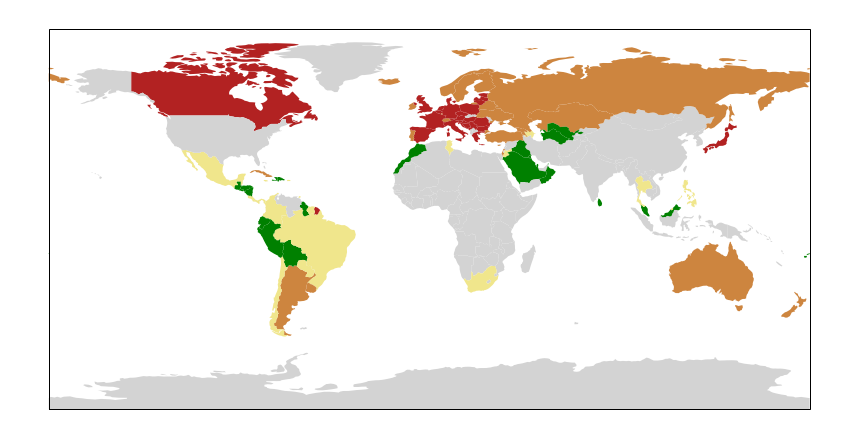

In [16]:
# Affichage de la carte du monde
plt.figure(figsize=(15,15)) #size of figure
shapename = 'admin_0_countries'
countries_shp = shpreader.natural_earth(resolution='110m',category='cultural', name=shapename)
ax = plt.axes(projection=ccrs.PlateCarree())
countries = shpreader.Reader(countries_shp).records()


for country in countries:
    #print(country.attributes['FORMAL_EN'])
    if country.attributes['NAME_LONG'] in low:
        ax.add_geometries(country.geometry, ccrs.PlateCarree(),
                          facecolor='green')
    
    elif country.attributes['NAME_LONG'] in middle_low:
        ax.add_geometries(country.geometry, ccrs.PlateCarree(),
                          facecolor='khaki')      

    elif country.attributes['NAME_LONG'] in middle_high:
        ax.add_geometries(country.geometry, ccrs.PlateCarree(),
                          facecolor='peru')   
        
    elif country.attributes['NAME_LONG'] in high:
        ax.add_geometries(country.geometry, ccrs.PlateCarree(),
                          facecolor='firebrick')
    else:
        ax.add_geometries(country.geometry, ccrs.PlateCarree(),
                          facecolor='lightgrey')

plt.show()

In [44]:
# on peut changer les couleurs : http://www.python-simple.com/img/img38.png

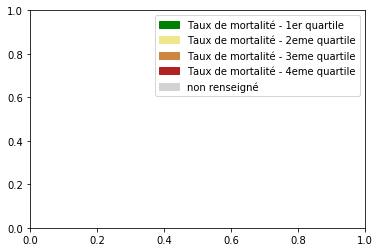

In [12]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

low = mpatches.Patch(color='green', label='Taux de mortalité - 1er quartile')
middle_low = mpatches.Patch(color='khaki', label='Taux de mortalité - 2eme quartile')
middle_high = mpatches.Patch(color='peru', label='Taux de mortalité - 3eme quartile')
high = mpatches.Patch(color='firebrick', label='Taux de mortalité - 4eme quartile')
na = mpatches.Patch(color='lightgrey', label='non renseigné')
plt.legend(handles=[low,middle_low,middle_high,high,na])

plt.show()


# voir avec les filles pour mettre la légende avec le  précédent graphe

    